In [2]:
import pandas as pd
import numpy as np
import nltk
import re
import difflib
from difflib import SequenceMatcher

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
import math

In [164]:
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import resample
from collections import Counter
from fuzzywuzzy import fuzz
from nltk.util import ngrams
from nltk import pos_tag
from nltk import RegexpParser
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [5]:
data = pd.read_csv("dataset.txt", delimiter ='\t', names =['num', 'sent1', 'sent2', 'rating', 'label'])

In [6]:
data.head(20)

,num,sent1,sent2,rating,label
0,1,A group of kids is playing in a yard and an ol...,A group of boys in a yard is playing and a man...,4.500,NEUTRAL
1,2,A group of children is playing in the house an...,A group of kids is playing in a yard and an ol...,3.200,NEUTRAL
2,3,The young boys are playing outdoors and the ma...,The kids are playing outdoors near a man with ...,4.700,ENTAILMENT
3,5,The kids are playing outdoors near a man with ...,A group of kids is playing in a yard and an ol...,3.400,NEUTRAL
4,9,The young boys are playing outdoors and the ma...,A group of kids is playing in a yard and an ol...,3.700,NEUTRAL
5,12,Two dogs are fighting,Two dogs are wrestling and hugging,4.000,NEUTRAL
6,14,A brown dog is attacking another animal in fro...,Two dogs are fighting,3.500,NEUTRAL
7,18,A brown dog is attacking another animal in fro...,Two dogs are wrestling and hugging,3.200,NEUTRAL
8,25,Nobody is riding the bicycle on one wheel,A person in a black jacket is doing tricks on ...,2.800,NEUTRAL
9,26,A person is riding the bicycle on one wheel,A man in a black jacket is doing tricks on a m...,3.700,NEUTRAL


In [7]:
data.drop('num', axis=1 , inplace = True)

In [8]:
data.head()

,sent1,sent2,rating,label
0,A group of kids is playing in a yard and an ol...,A group of boys in a yard is playing and a man...,4.5,NEUTRAL
1,A group of children is playing in the house an...,A group of kids is playing in a yard and an ol...,3.2,NEUTRAL
2,The young boys are playing outdoors and the ma...,The kids are playing outdoors near a man with ...,4.7,ENTAILMENT
3,The kids are playing outdoors near a man with ...,A group of kids is playing in a yard and an ol...,3.4,NEUTRAL
4,The young boys are playing outdoors and the ma...,A group of kids is playing in a yard and an ol...,3.7,NEUTRAL


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
sent1     4500 non-null object
sent2     4500 non-null object
rating    4500 non-null float64
label     4500 non-null object
dtypes: float64(1), object(3)
memory usage: 140.7+ KB


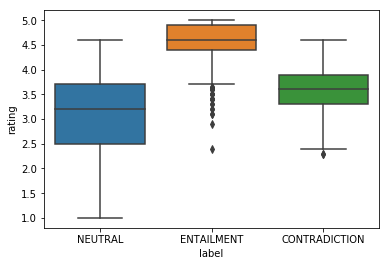

In [10]:
sns.boxplot(x='label', y='rating', data=data)

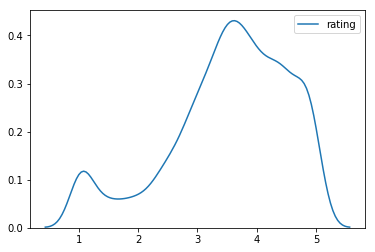

In [11]:
sns.kdeplot(data['rating'])

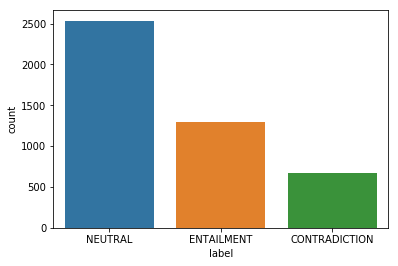

In [12]:
sns.countplot(x='label',data=data)

In [13]:
data.drop('rating', axis=1, inplace=True)

In [14]:
data.head()

,sent1,sent2,label
0,A group of kids is playing in a yard and an ol...,A group of boys in a yard is playing and a man...,NEUTRAL
1,A group of children is playing in the house an...,A group of kids is playing in a yard and an ol...,NEUTRAL
2,The young boys are playing outdoors and the ma...,The kids are playing outdoors near a man with ...,ENTAILMENT
3,The kids are playing outdoors near a man with ...,A group of kids is playing in a yard and an ol...,NEUTRAL
4,The young boys are playing outdoors and the ma...,A group of kids is playing in a yard and an ol...,NEUTRAL


In [15]:
data.describe()

,sent1,sent2,label
count,4500,4500,4500
unique,3146,3132,3
top,A man is playing the guitar,A man is playing a guitar,NEUTRAL
freq,20,20,2536


In [16]:
print(data['sent1'].nunique())
print(data['sent2'].nunique())

3146
3132


In [17]:
print(data['label'].unique())
print(data['label'].value_counts())

['NEUTRAL' 'ENTAILMENT' 'CONTRADICTION']
NEUTRAL          2536
ENTAILMENT       1299
CONTRADICTION     665
Name: label, dtype: int64


In [18]:
for i in range(0,4500):
    if data['label'][i]=='CONTRADICTION':
        data['label'][i]='contradiction'
    else:
        data['label'][i]='not contradiction'

In [19]:
data.head(20)

,sent1,sent2,label
0,A group of kids is playing in a yard and an ol...,A group of boys in a yard is playing and a man...,not contradiction
1,A group of children is playing in the house an...,A group of kids is playing in a yard and an ol...,not contradiction
2,The young boys are playing outdoors and the ma...,The kids are playing outdoors near a man with ...,not contradiction
3,The kids are playing outdoors near a man with ...,A group of kids is playing in a yard and an ol...,not contradiction
4,The young boys are playing outdoors and the ma...,A group of kids is playing in a yard and an ol...,not contradiction
5,Two dogs are fighting,Two dogs are wrestling and hugging,not contradiction
6,A brown dog is attacking another animal in fro...,Two dogs are fighting,not contradiction
7,A brown dog is attacking another animal in fro...,Two dogs are wrestling and hugging,not contradiction
8,Nobody is riding the bicycle on one wheel,A person in a black jacket is doing tricks on ...,not contradiction
9,A person is riding the bicycle on one wheel,A man in a black jacket is doing tricks on a m...,not contradiction


In [20]:
contraction ={'isn\'t':'is not','aren\'t' : 'are not','wasn\'t':'was not','weren\'t':'were not',
               'haven\'t':'have not', 'hasn\'t' :'has not','hadn\'t' :'had not','won\'t' :'will not',
               'wouldn\'t':'would not' ,'don\'t':'do not' ,'doesn\'t':'does not','didn\'t':'did not',
               'can\'t':'can not','couldn\'t':'could not','shouldn\'t':'should not','mightn\'t':'might not',
               'mustn\'t':'must not', 'it\'ll' : 'it will'}

LabelE = preprocessing.LabelEncoder()
data['label'] = LabelE.fit_transform(data['label'])

In [21]:
data_majority = data[data['label']==1]
data_minority = data[data['label']==0]

data_minority_upsampled = resample(data_minority, 
                                 replace=True,     
                                 n_samples=3500,    
                                 random_state=123)
data = pd.concat([data_majority, data_minority_upsampled])

In [22]:
data['label'].value_counts()

1    3835
0    3500
Name: label, dtype: int64

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7335 entries, 0 to 1468
Data columns (total 3 columns):
sent1    7335 non-null object
sent2    7335 non-null object
label    7335 non-null int64
dtypes: int64(1), object(2)
memory usage: 229.2+ KB


In [53]:
#test
sent = '   haven\'t it\'ll don\'t weren\'t. I know it\'ll'
sent_broken =''
words= sent.split()
#print(len(words))
for i in words:
    if i in contraction:
        sent_broken+=' '+contraction[i]
    else:
        sent_broken+=' '+i
print(sent_broken.strip())

# sent_clean = exp(sent)
sent_broken = re.sub('[^a-zA-Z\']', ' ', sent_broken)
sent_broken = sent_broken.lower()
print(sent_broken.strip())

print(preprocess(sent))

have not it will do not weren't. I know it will
have not it will do not weren't  i know it will
{'NN': 0.3333333333333333, 'JJ': 0.3333333333333333, 'VB': 0.3333333333333333}


In [25]:
#breaking down contractions
def breakDown(sent):
    sent_broken =''
    words= sent.split()
    for i in words:
        if i in contraction:
            sent_broken+=' '+contraction[i]
        else:
            sent_broken+=' '+i
    return sent_broken.strip()

In [26]:
#cleaning text and converting to lowercase
def clean_sent(sent):
    sent_broken = re.sub('[^a-zA-Z\']', ' ', sent)
    sent_broken = sent_broken.lower()
    return sent_broken.strip()

In [27]:
#finding frequency of words in each sentence
def wordListToFreqDict(wordstring):
    wordlist = wordstring.split()
    wordfreq = [wordlist.count(w) for w in wordlist]
    return dict(list(zip(wordlist, wordfreq)))

In [48]:
#test
text = 'I see, what you. Did thereafter, but i was not moved!'
n= clean_sent(text)
n= removeStopWords(n)
m = wordListToFreqDict(n)
print(m)

{'see': 1, 'thereafter': 1, 'moved': 1}


In [29]:
#removing stopwords
sw = stopwords.words("english")
def removeStopWords(text):
    text = [word.lower() for word in text.split() if word not in sw]
    return " ".join(text)

In [30]:
#snowball stemmer stems words to root words
stemmer = SnowballStemmer("english")
def stem(text):
    text =  [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [31]:
#jaccard distance is size of intersection divided by size of union of two sets of words in sentences
def jaccard_dist(sent1, sent2):
    return nltk.jaccard_distance(set(sent1), set(sent2))

In [32]:
#Levenshtein distance is a measure which tells us how different strings are by computing how many edits it would take for one string to become the other. Higher the number, worse is the similarity
def Levenshtein(sent1, sent2):
    return nltk.edit_distance(sent1, sent2)

In [33]:
#tagging words using parts_of_speech
nltk.download('averaged_perceptron_tagger')
def preprocess(sent):
    sent = sent.split()
    tags = nltk.pos_tag(sent)
    res ={'NN':0 ,'JJ' :0 , 'VB' :0}
    
    for word ,tag in tags:
        if tag in ['NN','NNS','NNP','NNPS']:
            res['NN']+=1;
        elif tag in ['JJ','JJR','JJS']:
            res['JJ']+=1
        elif tag in ['VB','VBD','VBG','VBN','VBP','VBZ']:
            res['VB']+=1
    
    total = sum(res.values())
    return dict((word, float(count)/total) for word,count in res.items())

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/shubhangi/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [34]:
#euclidean distance
def euclidDistance(v1 ,v2):
    return math.sqrt(sum((v1[k] - v2[k])**2 for k in set(v1.keys()).intersection(set(v2.keys()))))

In [35]:
#cosine similarity between vectors
def cosine(vec1, vec2):
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in intersection])
    sum1 = sum([vec1[x]**2 for x in vec1.keys()])
    sum2 = sum([vec2[x]**2 for x in vec2.keys()])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)
    if not denominator:
        return 0.0
    else:
        return float(numerator) / denominator


In [51]:
word_compile = re.compile(r'\w+')
def text_to_vector(text):
    words = word_compile.findall(text)
    return Counter(words)

In [52]:
#test
text1 = 'This is a mango .'
text2 = 'This should be a man .'

vector1 = text_to_vector(text1)
vector2 = text_to_vector(text2)

cosine = cosine(vector1, vector2)

print('cosine is', str(cosine))
print('fuzzy is', str(fuzzy(text1, text2)))

cosine is 0.4472135954999579
fuzzy is 0.72


In [38]:
#l2 distance which calculates square of diatance between vectors
def l2Distance(v1 ,v2):
    return math.sqrt(sum((v1[k] - v2[k])**2 for k in set(v1.keys()).intersection(set(v2.keys()))))

In [39]:
#fuzzy wuzzy library gives score out of 100, by comparing two strings and similarity between them
def fuzzy(sent1 ,sent2):
    return fuzz.ratio(sent1 , sent2)/100

In [40]:
#difflib provides classes and functions for comparing sequences.
def difflib(text1, text2):
    return SequenceMatcher(None, text1, text2).ratio()

In [46]:
text_1 =' this is a mango'
text_2 = 'This is a fruit'
print(difflib(text_1,text_2))
print(Ngrams(text_1, 3))

0.5806451612903226
['this is a', 'is a mango']


In [43]:
#defining n grams
def Ngrams(s, n):
    tokens = [token for token in s.split(" ") if token != ""]
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in ngrams]

In [61]:
#cosine using n grams is more effective than cosine by itself, since cosine by itself just looks at vectors of individual letter, but ngrams helps to group them and then apply cosine 
def cosine_ngrams(text1, text2, n):
    vec1 = Counter(Ngrams(text1,n))
    vec2 = Counter(Ngrams(text2,n))
    
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in intersection])

    sum1 = sum([vec1[x]**2 for x in vec1.keys()])
    sum2 = sum([vec2[x]**2 for x in vec2.keys()])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)

    if not denominator:
        return 0.0
    return float(numerator) / denominator

In [74]:
text1 = 'This is an apple hanging from a tree'
text2 = 'This  is a mango on a tree'
print(cosine_ngrams(text1, text2, 2))

0.3086066999241838
1


In [77]:
tag=[]
for x in range(data.shape[0]):
    d1 = preprocess(data['sent1'].iloc[x])
    d2 = preprocess(data['sent2'].iloc[x])
    
    d3 = [ abs(d1[key] - d2.get(key, 0)) for key in d1.keys()]
    tag.append(d3)

In [79]:
tag

[[0.05555555555555558, 0.1, 0.0444444444444444],
 [0.05555555555555558, 0.1, 0.0444444444444444],
 [0.29166666666666663, 0.125, 0.16666666666666669],
 [0.16666666666666663, 0.1, 0.06666666666666671],
 [0.125, 0.024999999999999994, 0.09999999999999998],
 [0.08333333333333331, 0.0, 0.08333333333333337],
 [0.2916666666666667, 0.125, 0.41666666666666663],
 [0.375, 0.125, 0.5],
 [0.02857142857142858, 0.14285714285714285, 0.11428571428571432],
 [0.02857142857142858, 0.14285714285714285, 0.11428571428571432],
 [0.02857142857142858, 0.14285714285714285, 0.11428571428571432],
 [0.0892857142857143, 0.0, 0.0892857142857143],
 [0.15873015873015872, 0.1111111111111111, 0.047619047619047616],
 [0.2142857142857143, 0.125, 0.0892857142857143],
 [0.09999999999999998, 0.16666666666666666, 0.06666666666666671],
 [0.09999999999999998, 0.16666666666666666, 0.06666666666666671],
 [0.16666666666666669, 0.16666666666666666, 0.3333333333333333],
 [0.26666666666666666, 0.0, 0.2666666666666666],
 [0.0, 0.0, 0.0]

In [90]:
#finally applying all features to our table
#cleaning the sentences
data['sent1'] = data['sent1'].apply(lambda x: breakDown(x))
data['sent2'] = data['sent2'].apply(lambda x: breakDown(x))
data['sent1'] = data['sent1'].apply(lambda x: clean_sent(x))
data['sent2'] = data['sent2'].apply(lambda x: clean_sent(x))
data['sent1'] = data['sent1'].apply(lambda x: removeStopWords(x))
data['sent2'] = data['sent2'].apply(lambda x: removeStopWords(x))
data['sent1'] = data['sent1'].apply(lambda x: stem(x))
data['sent2'] = data['sent2'].apply(lambda x: stem(x))

In [110]:
data.head()

,sent1,sent2,label,sent1_freq,sent2_freq,jacc,levenshtein_dist,euclid,L2,fuzzy,...,sent1_trigrams,sent2_trigrams,cosine_bigrams,cosine,cosine_trigrams,noun,adjective,verb,jacc_gram_2,jacc_gram_3
0,group kid play yard old man stand background,group boy yard play man stand background,1,"{'group': 1, 'kid': 1, 'play': 1, 'yard': 1, '...","{'group': 1, 'boy': 1, 'yard': 1, 'play': 1, '...",0.055556,10,0.0,0.0,0.83,...,"[group kid play, kid play yard, play yard old,...","[group boy yard, boy yard play, yard play man,...",0.308607,0.801784,0.182574,0.055556,0.100,0.044444,0.181818,0.1
1,group children play hous man stand background,group kid play yard old man stand background,1,"{'group': 1, 'children': 1, 'play': 1, 'hous':...","{'group': 1, 'kid': 1, 'play': 1, 'yard': 1, '...",0.100000,13,0.0,0.0,0.81,...,"[group children play, children play hous, play...","[group kid play, kid play yard, play yard old,...",0.308607,0.668153,0.182574,0.055556,0.100,0.044444,0.181818,0.1
2,young boy play outdoor man smile nearbi,kid play outdoor near man smile,1,"{'young': 1, 'boy': 1, 'play': 1, 'outdoor': 1...","{'kid': 1, 'play': 1, 'outdoor': 1, 'near': 1,...",0.166667,21,0.0,0.0,0.66,...,"[young boy play, boy play outdoor, play outdoo...","[kid play outdoor, play outdoor near, outdoor ...",0.365148,0.617213,0.000000,0.291667,0.125,0.166667,0.222222,0.0
3,kid play outdoor near man smile,group kid play yard old man stand background,1,"{'kid': 1, 'play': 1, 'outdoor': 1, 'near': 1,...","{'group': 1, 'kid': 1, 'play': 1, 'yard': 1, '...",0.210526,28,0.0,0.0,0.45,...,"[kid play outdoor, play outdoor near, outdoor ...","[group kid play, kid play yard, play yard old,...",0.169031,0.433013,0.000000,0.166667,0.100,0.066667,0.090909,0.0
4,young boy play outdoor man smile nearbi,group kid play yard old man stand background,1,"{'young': 1, 'boy': 1, 'play': 1, 'outdoor': 1...","{'group': 1, 'kid': 1, 'play': 1, 'yard': 1, '...",0.157895,26,0.0,0.0,0.48,...,"[young boy play, boy play outdoor, play outdoo...","[group kid play, kid play yard, play yard old,...",0.000000,0.267261,0.000000,0.125000,0.025,0.100000,0.000000,0.0


In [103]:
#applying features
data['sent1_freq'] = data['sent1'].apply(lambda x: wordListToFreqDict(x))
data['sent2_freq'] = data['sent2'].apply(lambda x: wordListToFreqDict(x))

data['jacc'] = data.apply(lambda x:jaccard_dist(x['sent1'],x['sent2']),axis=1)

data['levenshtein_dist'] = data.apply(lambda x:Levenshtein(x['sent1'],x['sent2']),axis=1)

data['euclid'] = data.apply(lambda x: euclidDistance(text_to_vector(x['sent1']) ,text_to_vector(x['sent2'])), axis=1)

data['L2'] = data.apply(lambda x: l2Distance(text_to_vector(x['sent1']) ,text_to_vector(x['sent2'])), axis=1)

data['fuzzy'] = data.apply(lambda x: fuzzy(x['sent1'] ,x['sent2']), axis=1)

data['diff_lib'] = data.apply(lambda x: difflib(x['sent1'] ,x['sent2']), axis=1)

data['sent1_bigrams'] = data['sent1'].apply(lambda x: Ngrams(x,2))
data['sent2_bigrams'] = data['sent2'].apply(lambda x: Ngrams(x,2))



In [109]:
data['sent1_trigrams'] = data['sent1'].apply(lambda x: Ngrams(x,3))
data['sent2_trigrams'] = data['sent2'].apply(lambda x: Ngrams(x,3))
data['cosine'] = data.apply(lambda x: cosine_ngrams(x['sent1'] ,x['sent2'], 1), axis=1)

data['cosine_bigrams'] = data.apply(lambda x: cosine_ngrams(x['sent1'] ,x['sent2'], 2), axis=1)

data['cosine_trigrams'] = data.apply(lambda x: cosine_ngrams(x['sent1'] ,x['sent2'], 3), axis=1)

data[['noun','adjective','verb']] = pd.DataFrame((x[0],x[1],x[2]) for x in tag)

data['jacc_gram_2'] = data.apply(lambda x: jaccard_distance(Ngrams(x['sent1'],2) ,Ngrams(x['sent2'],2)), axis=1)

data['jacc_gram_3'] = data.apply(lambda x: jaccard_distance(Ngrams(x['sent1'],3) ,Ngrams(x['sent2'],3)), axis=1)


In [114]:
#total features generated till now
list(data.columns[3:])

['sent1_freq',
 'sent2_freq',
 'jacc',
 'levenshtein_dist',
 'euclid',
 'L2',
 'fuzzy',
 'diff_lib',
 'sent1_bigrams',
 'sent2_bigrams',
 'sent1_trigrams',
 'sent2_trigrams',
 'cosine_bigrams',
 'cosine',
 'cosine_trigrams',
 'noun',
 'adjective',
 'verb',
 'jacc_gram_2',
 'jacc_gram_3']

In [142]:
x=  data.drop(['sent1_trigrams','sent1_bigrams','sent2_bigrams','sent2_trigrams'], axis=1)

X = x.iloc[:,6:]


x_train,x_test,y_train,y_test = train_test_split(X,data['label'],test_size = 0.4,random_state=1)


In [157]:
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

/home/shubhangi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.8139059304703476
[[1023  381]
 [ 165 1365]]
              precision    recall  f1-score   support

           0       0.86      0.73      0.79      1404
           1       0.78      0.89      0.83      1530

   micro avg       0.81      0.81      0.81      2934
   macro avg       0.82      0.81      0.81      2934
weighted avg       0.82      0.81      0.81      2934



In [158]:
k_range = range(1,20)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(x_train,y_train)
        y_pred=knn.predict(x_test)
        scores[k] = metrics.accuracy_score(y_test,y_pred)
        scores_list.append(metrics.accuracy_score(y_test,y_pred))

In [159]:
scores

{1: 0.9304703476482618,
 2: 0.9076346284935242,
 3: 0.9014996591683708,
 4: 0.8749147920927062,
 5: 0.8588957055214724,
 6: 0.8428766189502386,
 7: 0.8428766189502386,
 8: 0.8302658486707567,
 9: 0.8350374914792092,
 10: 0.8289025221540559,
 11: 0.8292433537832311,
 12: 0.8220858895705522,
 13: 0.8292433537832311,
 14: 0.821745057941377,
 15: 0.8241308793456033,
 16: 0.8210633946830266,
 17: 0.8268575323790047,
 18: 0.8227675528289026,
 19: 0.8258350374914792}

In [160]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.8588957055214724
[[1251  153]
 [ 261 1269]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1404
           1       0.89      0.83      0.86      1530

   micro avg       0.86      0.86      0.86      2934
   macro avg       0.86      0.86      0.86      2934
weighted avg       0.86      0.86      0.86      2934



In [161]:
model = DecisionTreeClassifier(max_depth=5)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.8343558282208589
[[ 965  439]
 [  47 1483]]
              precision    recall  f1-score   support

           0       0.95      0.69      0.80      1404
           1       0.77      0.97      0.86      1530

   micro avg       0.83      0.83      0.83      2934
   macro avg       0.86      0.83      0.83      2934
weighted avg       0.86      0.83      0.83      2934



In [162]:
rforest = RandomForestClassifier(n_estimators=100)
rforest.fit(x_train,y_train)
y_pred = rforest.predict(x_test)
feature_importances = pd.DataFrame(rforest.feature_importances_,index = x_train.columns,columns=['importance']).sort_values('importance',ascending=False)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.9584185412406271
Precision: 0.9855172413793103
[[1383   21]
 [ 101 1429]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1404
           1       0.99      0.93      0.96      1530

   micro avg       0.96      0.96      0.96      2934
   macro avg       0.96      0.96      0.96      2934
weighted avg       0.96      0.96      0.96      2934



In [165]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)
y_pred = svclassifier.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.8295841854124063
[[ 968  436]
 [  64 1466]]
              precision    recall  f1-score   support

           0       0.94      0.69      0.79      1404
           1       0.77      0.96      0.85      1530

   micro avg       0.83      0.83      0.83      2934
   macro avg       0.85      0.82      0.82      2934
weighted avg       0.85      0.83      0.83      2934



In [166]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.7897068847989094
[[1134  270]
 [ 347 1183]]
              precision    recall  f1-score   support

           0       0.77      0.81      0.79      1404
           1       0.81      0.77      0.79      1530

   micro avg       0.79      0.79      0.79      2934
   macro avg       0.79      0.79      0.79      2934
weighted avg       0.79      0.79      0.79      2934

